## Uber Rider

## Churn

## Supervised Learning

### Load Data

用先前已經整理乾淨的資料來做機器學習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '/Users/ytshen/Desktop/Machine_Learning/Uber_rider_churn_prediction/'
df = pd.read_csv(path + 'Uber_cleaned_data.csv')

#### Inspect data

In [2]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,phone_Android,phone_iPhone,...,city_King's Landing,city_Winterfell,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,1,...,1,0,0,0,0,0,0,1,0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,1,0,...,0,1,1,0,0,0,0,0,0,1


數值欄位的統計資訊

In [3]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,phone_Android,phone_iPhone,...,city_King's Landing,city_Winterfell,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.300440,0.691640,...,0.202600,0.466720,0.106860,0.102480,0.133760,0.138900,0.195340,0.194400,0.128260,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.458454,0.461821,...,0.401941,0.498896,0.308938,0.303282,0.340398,0.345846,0.396466,0.395742,0.334382,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null int64
weekday_pct               50000 non-null float64
phone_Android             50000 non-null int64
phone_iPhone              50000 non-null int64
phone_unknown             50000 non-null int64
city_Astapor              50000 non-null int64
city_King's Landing       50000 non-null int64
city_Winterfell           50000 non-null int64
signup_dayofweek_0        50000 non-null int64
signup_dayofweek_1        50000 non-null int64
signup_dayofweek_2        50000 non-null int64
signup_dayofweek_3        50000 non-null int64
signup_dayofweek_4        50000 n

In [5]:
df.columns # 欄位名稱

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'phone_Android', 'phone_iPhone', 'phone_unknown', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'signup_dayofweek_0',
       'signup_dayofweek_1', 'signup_dayofweek_2', 'signup_dayofweek_3',
       'signup_dayofweek_4', 'signup_dayofweek_5', 'signup_dayofweek_6',
       'churn'],
      dtype='object')

In [6]:
df.shape # 維度

(50000, 22)

選出需要拿來做模型的欄位，和拿來做預測的欄位

In [7]:
selected_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
                     'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
                     'phone_Android', 'phone_iPhone', 'phone_unknown',
                     'city_Astapor', "city_King's Landing", 'city_Winterfell']

# selected_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
#                      'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
#                      'phone_Android', 'phone_iPhone', 'phone_unknown', 'city_Astapor',
#                      "city_King's Landing", 'city_Winterfell', 'signup_dayofweek_0',
#                      'signup_dayofweek_1', 'signup_dayofweek_2', 'signup_dayofweek_3',
#                      'signup_dayofweek_4', 'signup_dayofweek_5', 'signup_dayofweek_6']

target = 'churn'

X = df[selected_features].values
y = df['churn'].values

print(X.shape)
print(y)

(50000, 14)
[0 1 1 ... 1 1 1]


### Train test split

把資料分成訓練集和測試集

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, penalty='l2') # 用 Ridge
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
p_train_pred = lr.predict_proba(X_train)[:, 1] # 輸出是 0 和是 1 的機率，我要的是 1 的機率

y_test_pred = lr.predict(X_test)
p_test_pred = lr.predict_proba(X_test)[:, 1]

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Metric scores

定義一個函數來計算所有的分數

In [10]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

# Function for metric scores
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                           accuracy_score(y_train, p_train_pred > threshold),
                           precision_score(y_train, p_train_pred > threshold),
                           recall_score(y_train, p_train_pred > threshold),
                           f1_score(y_train, p_train_pred > threshold)]
    
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                         accuracy_score(y_test, p_test_pred > threshold),
                         precision_score(y_test, p_test_pred > threshold),
                         recall_score(y_test, p_test_pred > threshold),
                         f1_score(y_test, p_test_pred > threshold)]
    
    all_metrics = pd.DataFrame({'metrics': metric_names,
                                'train': metric_values_train,
                                'test': metric_values_test},
                                columns=['metrics', 'train', 'test'])

    all_metrics.set_index('metrics')
    print(all_metrics)

定義一個函數把 train 和 test 的 roc curve 畫出來

In [11]:
from sklearn.metrics import roc_curve, auc

# Function for metric plot
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             linewidth=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             linewidth=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

計算結果

     metrics     train      test
0        AUC  0.760681  0.764023
1   Accuracy  0.717475  0.721800
2  Precision  0.735859  0.739208
3     Recall  0.853237  0.857463
4   f1-score  0.790213  0.793956


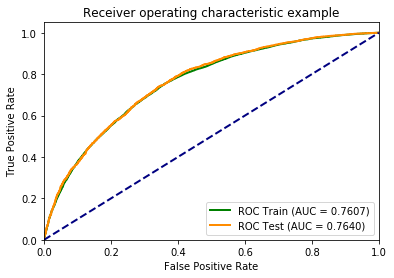

In [12]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Estimated coefficients

In [13]:
coef_values = zip(selected_features, lr.coef_.flatten()) # 把係數的名字和數值連結起來
df_coeffs = pd.DataFrame(list(coef_values))
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.sort_values(by='coeff', ascending=False, inplace=True)
df_coeffs

,feature,coeff
11,city_Astapor,0.659806
8,phone_Android,0.443715
3,avg_surge,0.198335
1,avg_rating_by_driver,0.145791
13,city_Winterfell,0.135279
2,avg_rating_of_driver,0.132317
0,avg_dist,0.035350
7,weekday_pct,0.000191
4,surge_pct,-0.004126
10,phone_unknown,-0.049709


14


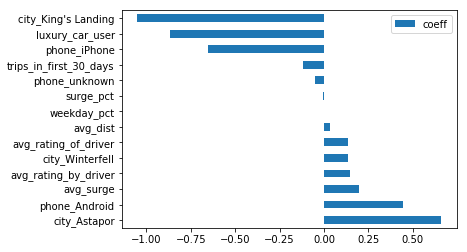

In [14]:
print(X.shape[1]) # 有幾個欄位 (就有幾個係數) 

ax = df_coeffs.plot.barh() # 水平的 bar 圖
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Bagging

#### Single Tree

     metrics     train      test
0        AUC  0.914333  0.810793
1   Accuracy  0.829575  0.757000
2  Precision  0.853235  0.797539
3     Recall  0.877691  0.819229
4   f1-score  0.865290  0.808239


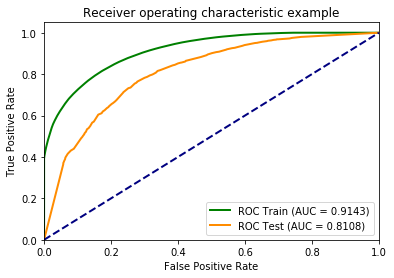

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:, 1]

y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:, 1]

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

因為想要重複使用，所以寫成函數

In [16]:
# Function for trees
def train_test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:, 1]
    
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:, 1]
    
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Bagged Trees

     metrics     train      test
0        AUC  0.919577  0.853736
1   Accuracy  0.835225  0.784300
2  Precision  0.844172  0.803890
3     Recall  0.902345  0.866261
4   f1-score  0.872290  0.833911


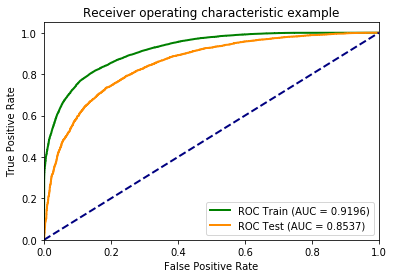

In [17]:
from sklearn.ensemble import BaggingClassifier

base_clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)

parameters = {'base_estimator': base_clf,
              'n_estimators': 100,
              'n_jobs': -1}

clf = BaggingClassifier(**parameters)

train_test_model(clf, X_train, y_train, X_test, y_test)

#### Single kNN

     metrics     train      test
0        AUC  0.926971  0.771744
1   Accuracy  0.850100  0.740700
2  Precision  0.867044  0.780006
3     Recall  0.897214  0.815070
4   f1-score  0.881871  0.797152


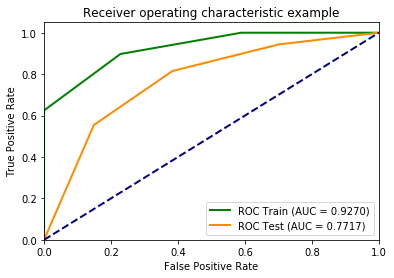

In [18]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':3,
          'leaf_size':100}

base_classifier = KNeighborsClassifier(**params)

clf = base_classifier

train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

     metrics     train      test
0        AUC  0.955025  0.798840
1   Accuracy  0.867700  0.745700
2  Precision  0.882756  0.783660
3     Recall  0.908519  0.819389
4   f1-score  0.895452  0.801126


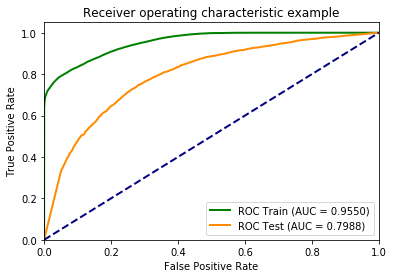

In [19]:
from sklearn.ensemble import BaggingClassifier

params = {'base_estimator':base_classifier,
          'n_estimators':30,
          'n_jobs':-1}

clf = BaggingClassifier(**params)

train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

     metrics     train      test
0        AUC  0.873699  0.856362
1   Accuracy  0.799325  0.786100
2  Precision  0.812833  0.801732
3     Recall  0.881098  0.873940
4   f1-score  0.845590  0.836280


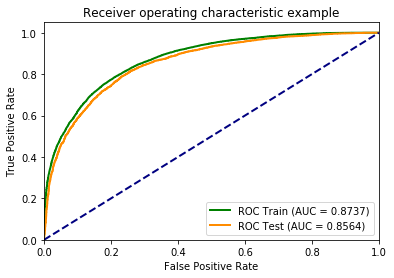

In [20]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': 50,
          'max_features': 'auto',
          'criterion': 'gini',
          'max_depth': 20,
          'min_samples_split': 2,
          'min_samples_leaf': 20,
          'random_state': 0,
          'n_jobs': -1}

clf = RandomForestClassifier(**params)
# clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees

     metrics     train      test
0        AUC  0.873722  0.863193
1   Accuracy  0.803350  0.793700
2  Precision  0.823773  0.813943
3     Recall  0.870996  0.868501
4   f1-score  0.846726  0.840337


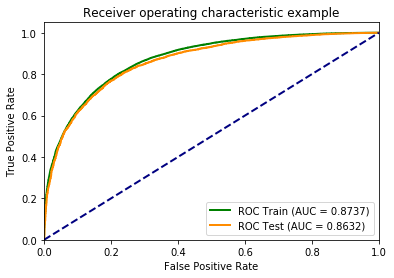

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': 50,
          'max_depth': 5,
          'learning_rate': 0.2,
          'random_state': 42}

params = {'n_estimators': 50,
          'max_depth': 5,
          'learning_rate': 0.2,
          'subsample': 0.7,
          'max_features': 0.8,
          'random_state': 42}

clf = GradientBoostingClassifier(**params)

train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

     metrics     train      test
0        AUC  0.821577  0.820328
1   Accuracy  0.763275  0.766900
2  Precision  0.769485  0.771168
3     Recall  0.885749  0.891697
4   f1-score  0.823534  0.827064


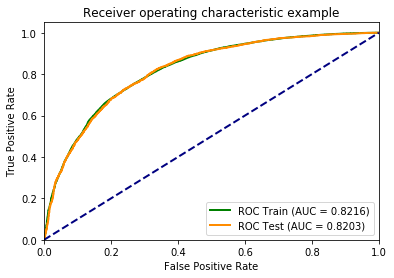

In [22]:
from sklearn.neural_network import MLPClassifier

params = {'solver': 'adam',
          'activation': 'relu',
          'alpha': 1e-5, # increase alpha -> increase penalty
          'hidden_layer_sizes': (5, 5),
          'learning_rate': 'adaptive',
          'random_state': 1}

clf = MLPClassifier(**params)

train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

     metrics     train      test
0        AUC  0.593032  0.594433
1   Accuracy  0.684050  0.686900
2  Precision  0.672633  0.674653
3     Recall  0.961155  0.964006
4   f1-score  0.791418  0.793783


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


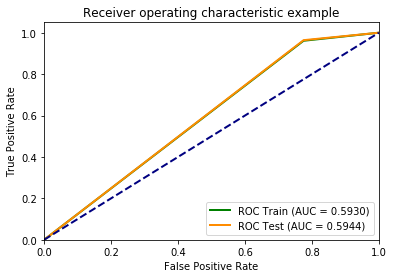

In [23]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

p_train_pred = clf.predict(X_train)
p_test_pred = clf.predict(X_test)

get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


     metrics     train      test
0        AUC  0.620517  0.596075
1   Accuracy  0.639450  0.636600
2  Precision  0.634280  0.633099
3     Recall  0.996312  0.995681
4   f1-score  0.775106  0.774033


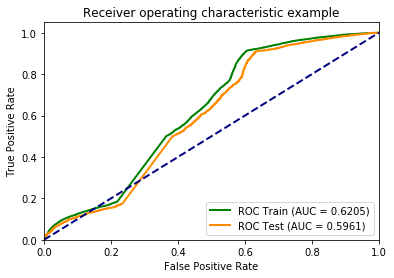

In [24]:
from sklearn.svm import SVC

params = {'probability': True,
          'max_iter': 2000}

clf = SVC(**params)

train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200],
              'max_features': ['auto'],
              'criterion': ['gini'],
              'max_depth': [15, 20, 25],
              'min_samples_split': [2],
              'min_samples_leaf': [2, 10, 20],
              'n_jobs':[-1]}

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

     metrics     train      test
0        AUC  0.894841  0.857255
1   Accuracy  0.815050  0.788200
2  Precision  0.824836  0.802784
3     Recall  0.893085  0.876500
4   f1-score  0.857605  0.838024


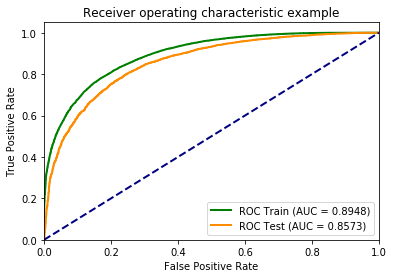

In [26]:
train_test_model(clf, X_train, y_train, X_test, y_test)